<a href="https://colab.research.google.com/github/JeongeunL/Boostcourse/blob/main/3_Pima_diabetes_data_with_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 구성

Pregnancies : 임신 횟수 <br>
Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 <br>
BloodPressure : 이완기 혈압 (mm Hg) <br>
SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값 <br>
Insulin : 2시간 혈청 인슐린 (mu U / ml) <br>
BMI : 체질량 지수 (체중kg / 키(m)^2) <br>
DiabetesPedigreeFunction : 당뇨병 혈통 기능 <br>
Age : 나이 <br>
Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


##EDA

###1. 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
PATH = "/content/drive/MyDrive/Colab Notebooks/부스트코스/data/"
df = pd.read_csv(PATH + "diabetes.csv")

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
# info로 데이터타입, 결측치, 메모리 사용량 등의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# 수치데이터에 대한 요약: 평균, 중위값, 최대/최소값 등...
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
# Pregnancies는 최소값이 0이 될 수 있음
# Glucose의 25% 값이 99인데 최소값이 0 --> 결측치로 보임
# BloodePressure이 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임
# SkinThickness가 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임
# BMI도 0이 나올 수 없는데, 0이 나옴 --> 결측치로 보임

In [11]:
# (숫자형 데이터에 대한 요약)
#df.describe(include="number")

### 2. 결측치 시각화

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
feature_columns = df.columns[:-1].to_list()

In [14]:
cols = feature_columns[1:] # Pregnancies는 결측치가 없는 것으로 보이므로 제외
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [15]:
# 결측치 여부를 나타내는 데이터프레임을 만듦
# 0을 결측치라 가정하고, 정답(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null이라는 데이터프레임에 담음

df_null = df[cols].replace(0, np.nan) # 0인 값을 결측치로 변경
df_null = df_null.isnull()
df_null.sum() # 결측치 개수

# => 이전 분석에서 Insulin이 중요한 피쳐로 나타나지 않았는데,
# 상식적으로는 당뇨병에 인슐린 수치가 많은 영향을 미칠 것으로 생각됨에도
# Insulin의 결측치가 많아서 중요한 피쳐로 나타나지 않은 것으로 보임

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<Axes: >

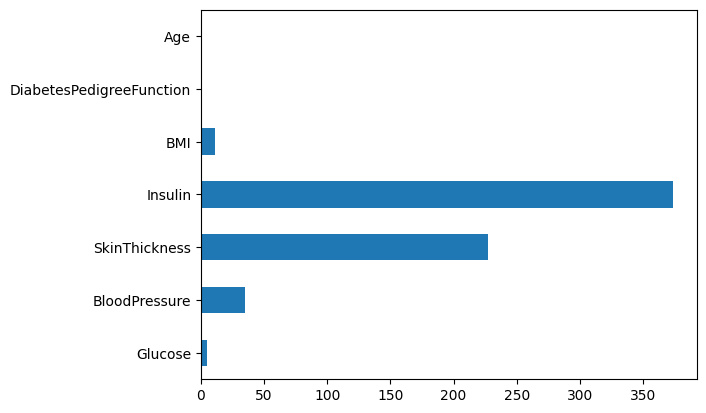

In [16]:
df_null.sum().plot.barh()

In [17]:
# 결측치의 비율 (한 컬럼당 결측치의 비율)
df_null.mean() * 100

# -> Insulin의 48%가 결측치

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

<Axes: >

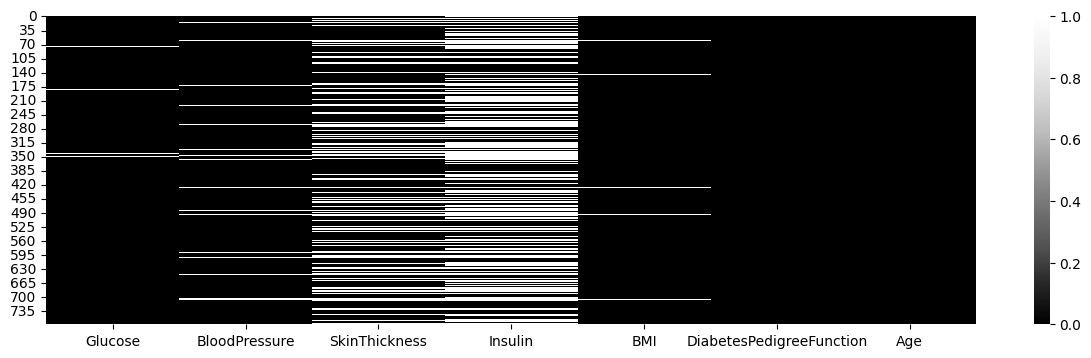

In [18]:
# 결측치를 heatmap으로 시각화
plt.figure(figsize=(15, 4))
sns.heatmap(df_null, cmap="Greys_r")

# 결측치는 흰색

### 3. 정답값 살펴보기

In [19]:
# 정답값인 Outcome의 개수 확인
df["Outcome"].value_counts()

# 당뇨병이 발병하면 1, 그렇지 않으면 0

0    500
1    268
Name: Outcome, dtype: int64

In [20]:
# 정답값인 Outcome의 비율 확인
df["Outcome"].value_counts(normalize=True)

# -> 발병하는 비율이 34%

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [21]:
# 다른 변수와 함께 보기 (ex) 임신 횟수에 따른 당뇨 발병 비율 및 빈도)
df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index()
# (인덱스에 올 column, value에 올 column)
df_po

# -> 임신 횟수가 많아질수록 당뇨 발병 비율이 높아짐
# 이 데이터에서, 임신 횟수가 14명 이상이면 당뇨가 100% 발병되는 것으로 나타남
# 하지만 14번 이상 임신한 경우가 많지 않음 (데이터 수가 적음)

Pregnancies      mean  count
0             0  0.342342    111
1             1  0.214815    135
2             2  0.184466    103
3             3  0.360000     75
4             4  0.338235     68
5             5  0.368421     57
6             6  0.320000     50
7             7  0.555556     45
8             8  0.578947     38
9             9  0.642857     28
10           10  0.416667     24
11           11  0.636364     11
12           12  0.444444      9
13           13  0.500000     10
14           14  1.000000      2
15           15  1.000000      1
16           17  1.000000      1

<Axes: >

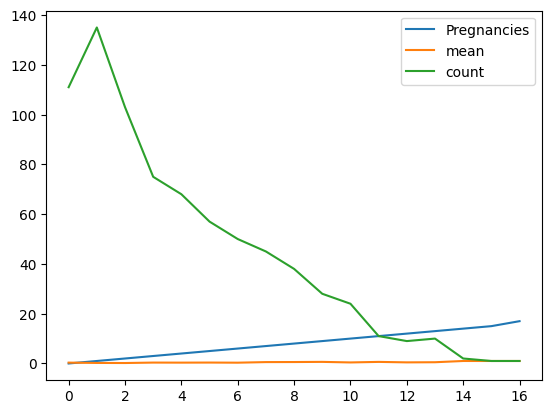

In [22]:
# 위의 결과 시각화
# 하지만, 단위가 다르기 때문에 다 같이 표현하는 것 적합하지 않아 보임
df_po.plot()

<Axes: >

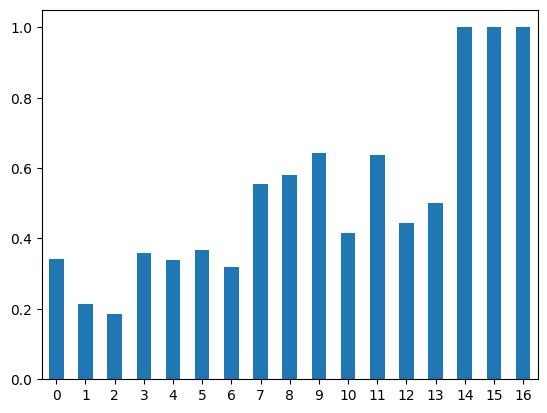

In [23]:
# 임신횟수에 따른 당뇨병 발병 비율 시각화
df_po["mean"].plot.bar(rot=0)
# rot: 글씨 rotation

### 4. Countplot

Countplot은 보통 한 개의 범주형 변수를 표현할 때 많이 사용한다.

<ipython-input-24-8b87634f7295>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Outcome", palette=palette)


<Axes: xlabel='Outcome', ylabel='count'>

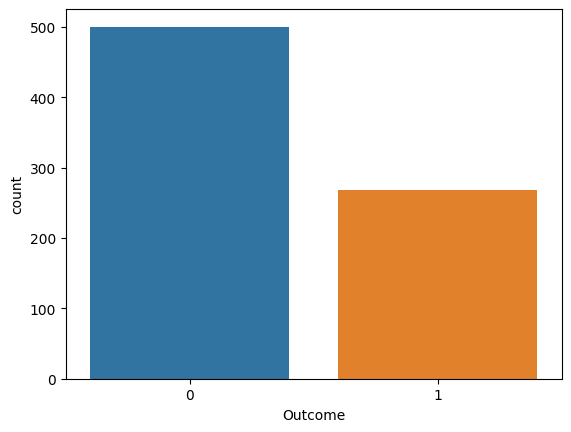

In [24]:
# 당뇨병 발병 빈도수 비교
palette = sns.color_palette('tab10', 2)
sns.countplot(data=df, x="Outcome", palette=palette)

<Axes: xlabel='Pregnancies', ylabel='count'>

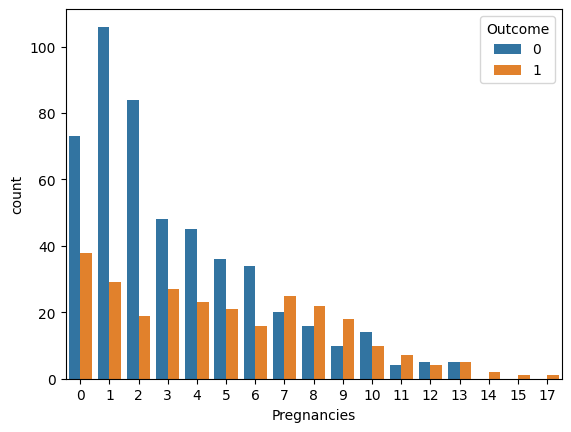

In [25]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교
sns.countplot(data=df, x="Pregnancies", hue="Outcome")

# -> 임신 횟수 7번 이상부터 발병 빈도가 발병하지 않은 빈도보다 더 높아짐
# 조건이 많아지면 case가 적은 경우 overfitting이 발생할 수 있다.
# 그래서 이런 경우엔 범주형 변수로 바꾸어 사용한다.

In [26]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만듦

df["Pregnancies_high"] = df["Pregnancies"] > 6 # 임신 횟수가 7명 이상인 경우
df[["Pregnancies", "Pregnancies_high"]].head()

Pregnancies  Pregnancies_high
0            6             False
1            1             False
2            8              True
3            1             False
4            0             False

<Axes: xlabel='Pregnancies_high', ylabel='count'>

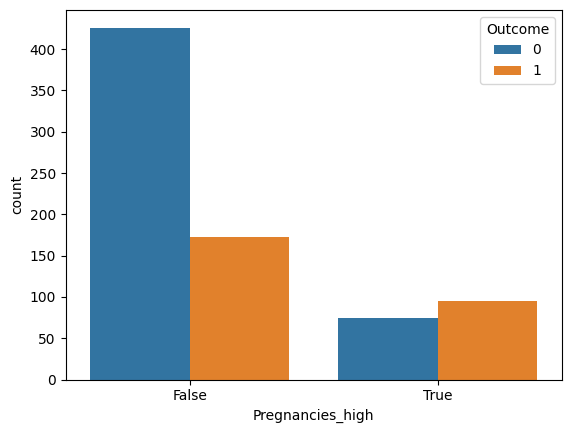

In [27]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현

sns.countplot(data=df, x="Pregnancies_high", palette=palette, hue="Outcome")
# -> 임신 횟수가 적은 그룹에서는 당뇨병 발병 비율이 상대적으로 적지만,
# 임신 횟수가 많은 그룹에서는 당뇨병 발병 비율이 조금 더 높다.

### 5. Barplot

<ipython-input-28-b7e4bee0ea9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Outcome", y="BMI", palette=palette)


<Axes: xlabel='Outcome', ylabel='BMI'>

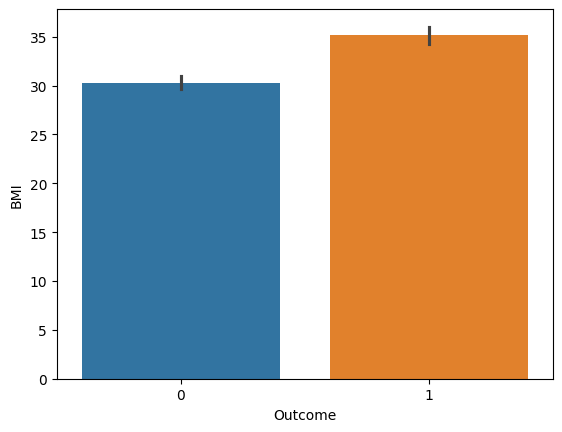

In [28]:
# 당뇨병 발병에 따른 BMI 수치를 비교
sns.barplot(data=df, x="Outcome", y="BMI", palette=palette)

<ipython-input-29-b83ac6bb508e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Outcome", y="Glucose", palette=palette)


<Axes: xlabel='Outcome', ylabel='Glucose'>

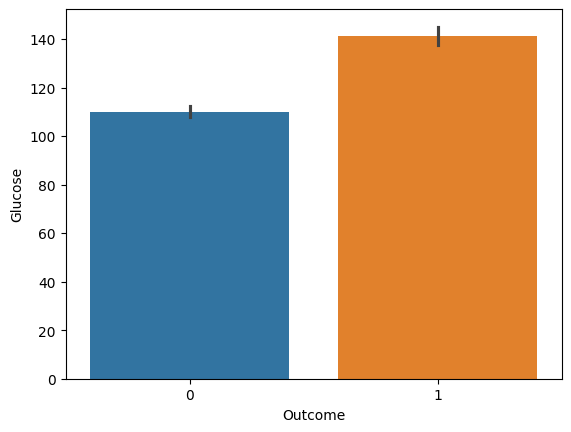

In [29]:
# 당뇨병 발병에 따른 포도당(Glucose) 수치를 비교
sns.barplot(data=df, x="Outcome", y="Glucose", palette=palette)

<ipython-input-30-5a238214c082>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Outcome", y="Insulin", palette=palette)


<Axes: xlabel='Outcome', ylabel='Insulin'>

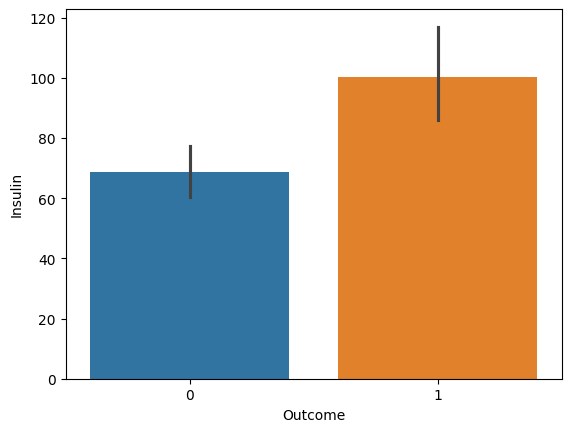

In [30]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병을 비교
sns.barplot(data=df, x="Outcome", y="Insulin", palette=palette)

# 검은색 막대: bootstrap(일부를 샘플링하여 일부 데이터의 95% 신뢰구간)
# Outcome=1인 경우 신뢰구간의 범위가 크게 나타나고 있다.

<ipython-input-31-cd68602138f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Pregnancies", y="Outcome", palette="husl")


<Axes: xlabel='Pregnancies', ylabel='Outcome'>

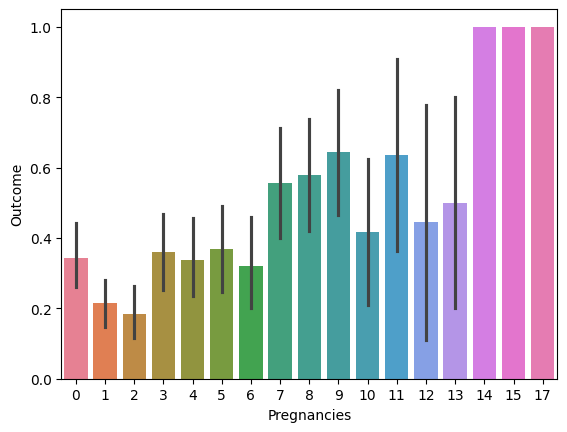

In [31]:
# 임신횟수에 대해서 당뇨병 발병 비율 비교
sns.barplot(data=df, x="Pregnancies", y="Outcome", palette="husl")

<Axes: xlabel='Pregnancies', ylabel='Glucose'>

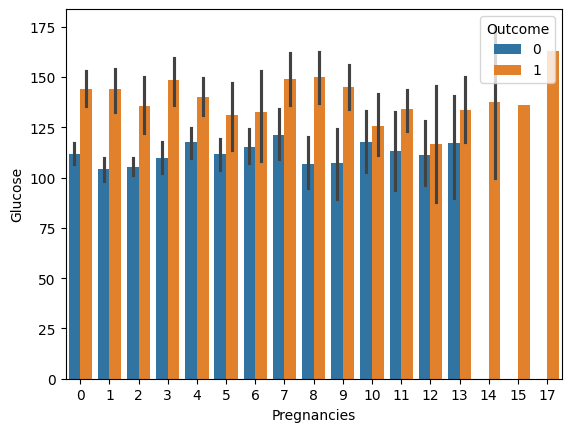

In [32]:
# 임신 횟수에 따른 포도당 수치를 당뇨병 발병 여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome", palette=palette)

# -> 당뇨병에 걸린 사람의 포도당 수치가 더 높게 나타난다.

<Axes: xlabel='Pregnancies', ylabel='BMI'>

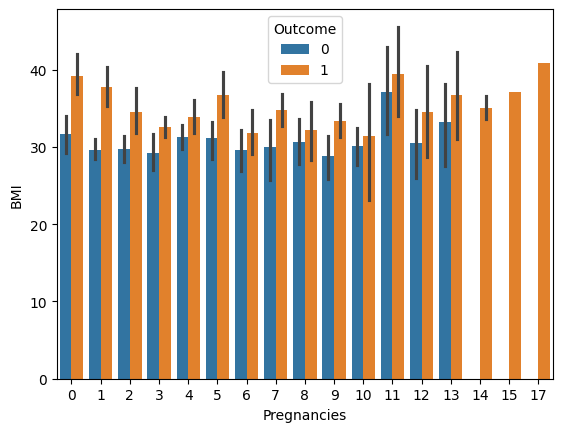

In [33]:
# 임신횟수에 따른 체질량지수를 당뇨병 발병여부에 따라 시각화
sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome", palette=palette)

# -> 당뇨병이 발병한 사람들의 BMI가 더 높다.

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

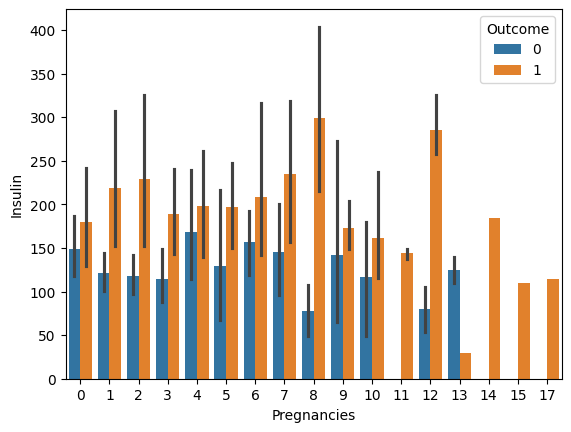

In [34]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
# (인슐린 수치에는 결측치가 많기 때문에, 0보다 큰 값에 대해서만 그림)

sns.barplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

###6. Boxplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

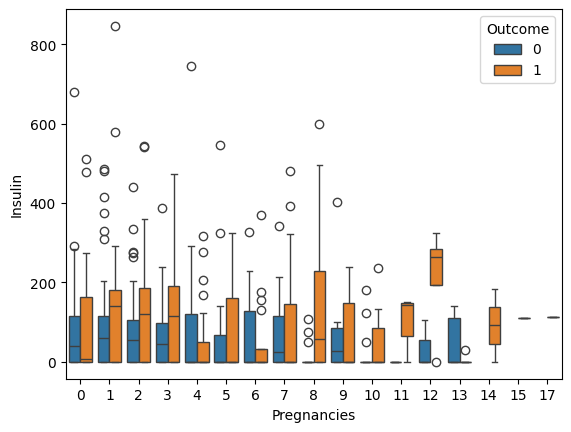

In [35]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
# A: 인슐린이 0인 값을 포함한 경우의 그래프

sns.boxplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome")
# -> boxplot이 주저앉아 있는 구간이 있다. 그 구간에 인슐린 결측치가 많기 때문

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

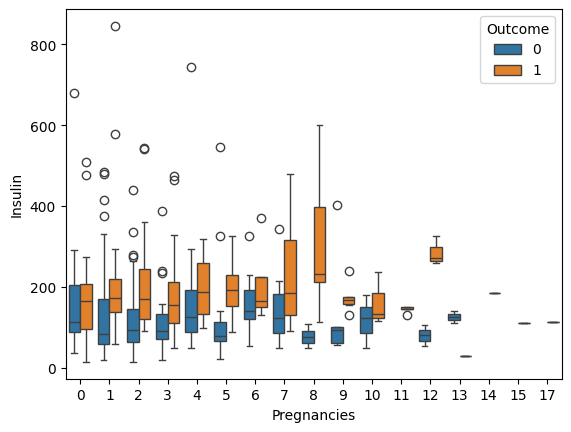

In [36]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병 여부에 따라 시각화
# B: 인슐린이 0인 값을 제외한 경우의 그래프

sns.boxplot(data=df[df["Insulin"]>0], x="Pregnancies", y="Insulin", hue="Outcome")

###7. Violinplot

<Axes: xlabel='Pregnancies', ylabel='Insulin'>

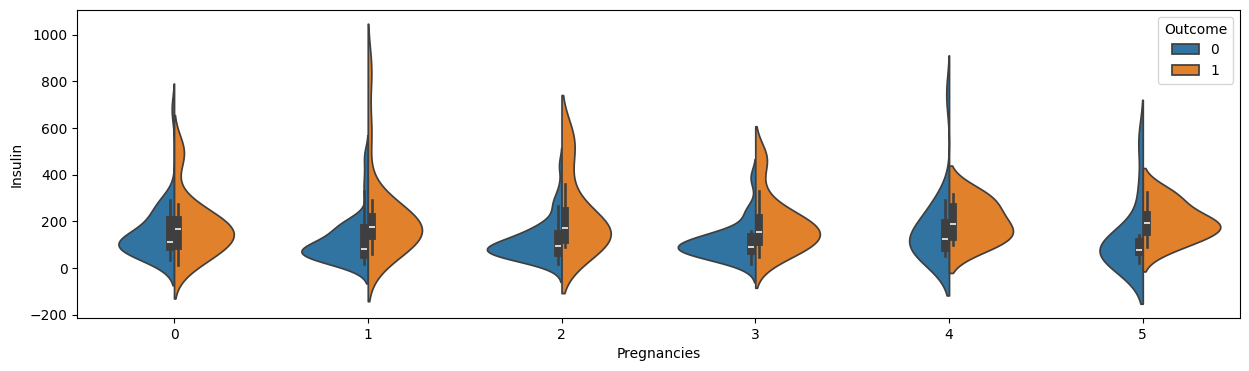

In [37]:
# 위의 그래프를 violinplot으로 시각화
plt.figure(figsize=(15, 4))
sns.violinplot(data=df[(df.Insulin > 0) & (df.Pregnancies < 6)], # (시각화를 위해 Pregnancies 수를 제한함)
               x="Pregnancies", y="Insulin", hue="Outcome", split=True)

###8. Swarmplot

Swarmplot은 산포도를 그리는 데 적합하다.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Pregnancies', ylabel='Insulin'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


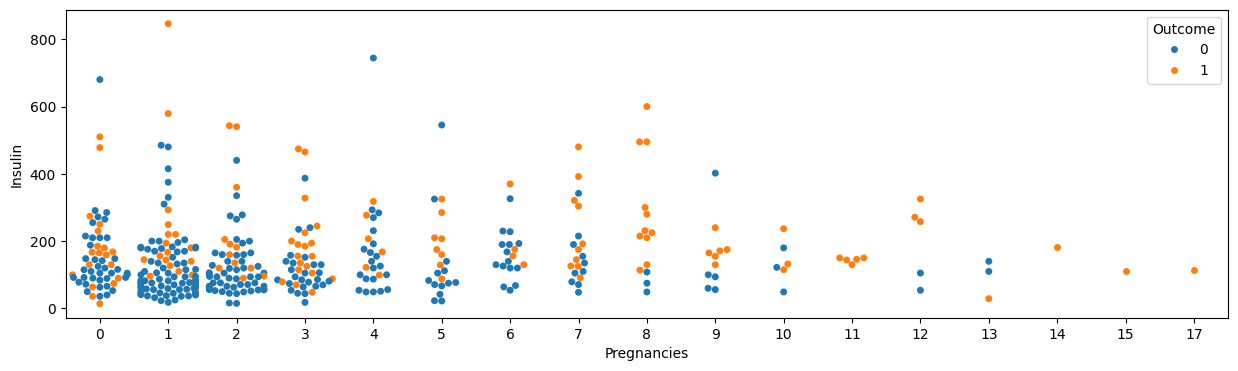

In [38]:
# 위의 그래프를 Swarmplot으로 시각화 (이번엔 Pregnancies 제한 안 함)

plt.figure(figsize=(15, 4))
sns.swarmplot(data=df[df["Insulin"]>0],
               x="Pregnancies", y="Insulin", hue="Outcome")

# 임신 횟수가 많은 경우의 데이터 수가 매우 적다는 것을 알 수 있다.

###9. Distplot

Distplot은 보통 한 개의 연속형(수치형) 변수를 표현할 때 사용한다.

In [39]:
df_0 = df[df["Outcome"] == 0] # 당뇨병이 발병하지 않은 케이스
df_1 = df[df["Outcome"] == 1] # 당뇨병이 발병한 케이스

df_0.shape, df_1.shape

((500, 10), (268, 10))

<ipython-input-40-3ed4b2fe0a77>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Pregnancies"])
<ipython-input-40-3ed4b2fe0a77>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Pregnancies"])


<Axes: xlabel='Pregnancies', ylabel='Density'>

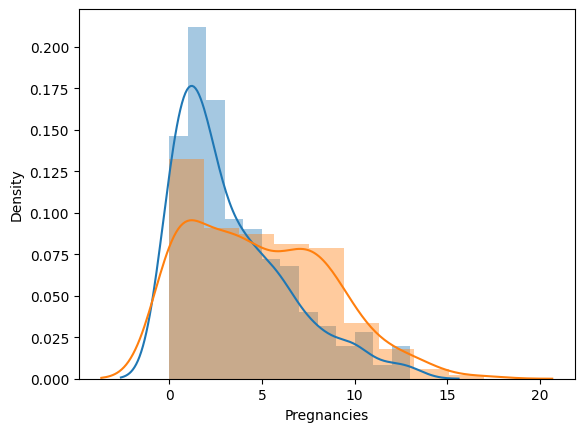

In [40]:
# 임신 횟수에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])
# (a는 series, hist는 히스토그램 표시 여부, kde는 밀도추정곡선, rug는 밑에 데이터 빈도 표시 여부)

# 임신 횟수가 대략 5번을 넘어가면 당뇨병 발병 케이스가 많아지는 것으로 보인다.

<ipython-input-41-cd505b02298e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
<ipython-input-41-cd505b02298e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1["Age"], hist=False, rug=True, label="1")


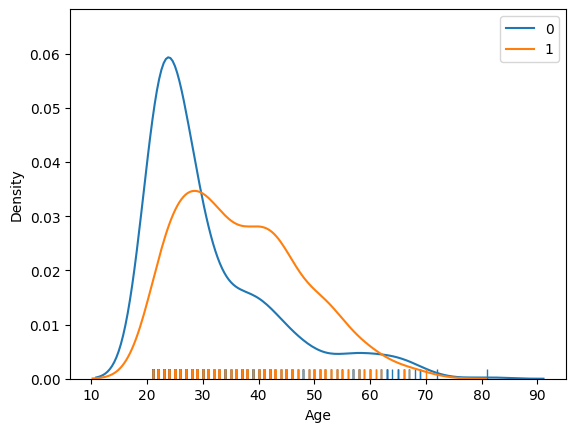

In [41]:
# 나이에 따른 당뇨병 발병 여부 시각화

sns.distplot(df_0["Age"], hist=False, rug=True, label="0")
sns.distplot(df_1["Age"], hist=False, rug=True, label="1")
plt.legend()
plt.show()

# 나이대가 30대를 넘어가면 당뇨병 발병 케이스가 많아지는 것으로 보인다.

###10. Subplot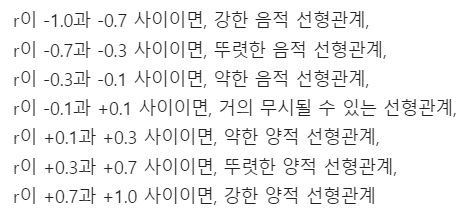

####Pandas를 통한 histplot 그리기

Pandas를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려준다.

In [46]:
# df_hist는 boolean 값을 지원하지 않기 때문에, boolean 값을 가진 변수를 int로 변경
# (최근 업데이트 되었는지 boolean 타입 변수는 알아서 제외하고 그린다.)

df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
df.head()
# -> boolean 값이 0, 1로 변경되었다.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  
0                     0.627   50        1                 0  
1                     0.351   31        0                 0  
2                     0.672   32        1                 1  
3                     0.167   21        0                 0  
4                     2.288   33        1                 0

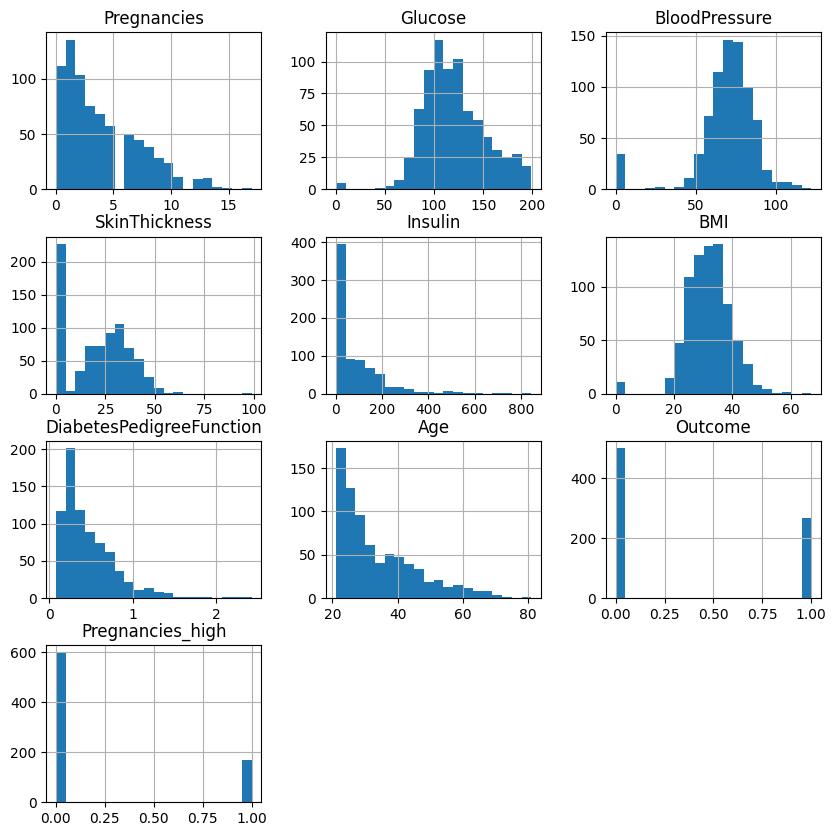

In [51]:
h = df.hist(figsize=(10, 10), bins=20)

# bins: 막대 개수

####반복문을 통한 서브플롯 그리기

> distplot

In [61]:
col_num = df.columns.shape # 컬럼의 개수
col_num

(10,)

In [63]:
cols=df.columns[:-1].tolist() # 마지막 컬럼은 Outcome이므로 제외함
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0


<ipython-input-74-2f0d6926199c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
<ipython-input-74-2f0d6926199c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
<ipython-input-74-2f0d6926199c>:9: UserWarning: 

`distplot` is

1 Glucose 0 1


<ipython-input-74-2f0d6926199c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
<ipython-input-74-2f0d6926199c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
<ipython-input-74-2f0d6926199c>:10: UserWarning: 

`distplot` i

2 BloodPressure 1 0
3 SkinThickness 1 1


<ipython-input-74-2f0d6926199c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
<ipython-input-74-2f0d6926199c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
<ipython-input-74-2f0d6926199c>:10: UserWarning: 

`distplot` i

4 Insulin 2 0
5 BMI 2 1


<ipython-input-74-2f0d6926199c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])
<ipython-input-74-2f0d6926199c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[row][col])
<ipython-input-74-2f0d6926199c>:10: UserWarning: 

`distplot` i

6 DiabetesPedigreeFunction 3 0
7 Age 3 1


<ipython-input-74-2f0d6926199c>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[row][col])


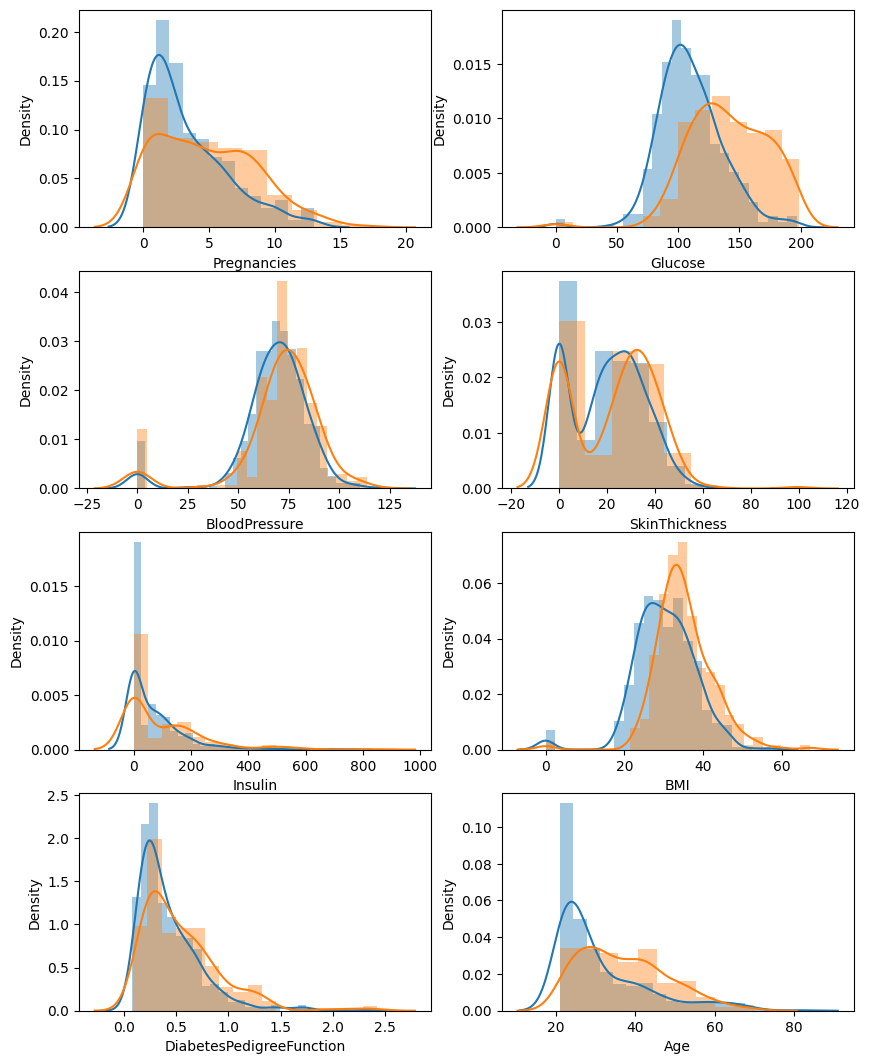

In [74]:
# distplot으로 서브프롯을 그림
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 13))

# 컬럼의 수만큼 for문을 만들어서 서브플롯으로 시각화
for i, col_name in enumerate(cols[:-1]):
  row = i // 2
  col = i % 2
  print(i, col_name, row, col)
  sns.distplot(df_0[col_name], ax=axes[row][col])
  sns.distplot(df_1[col_name], ax=axes[row][col])


In [ ]:
# 해석
# Pregnancies, Glucose, Age 유의미한 차이
# BMI: 당뇨병 환자가 조금 더 높은 경향
# BloodPressure: 큰 차이 없음

> Violinplot

0 Pregnancies 0 0
1 Glucose 0 1


<ipython-input-80-27bf895105ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)
<ipython-input-80-27bf895105ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)


2 BloodPressure 1 0
3 SkinThickness 1 1
4 Insulin 2 0


<ipython-input-80-27bf895105ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)
<ipython-input-80-27bf895105ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)
<ipython-input-80-27bf895105ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)


5 BMI 2 1
6 DiabetesPedigreeFunction 3 0
7 Age 3 1


<ipython-input-80-27bf895105ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)
<ipython-input-80-27bf895105ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)
<ipython-input-80-27bf895105ec>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)


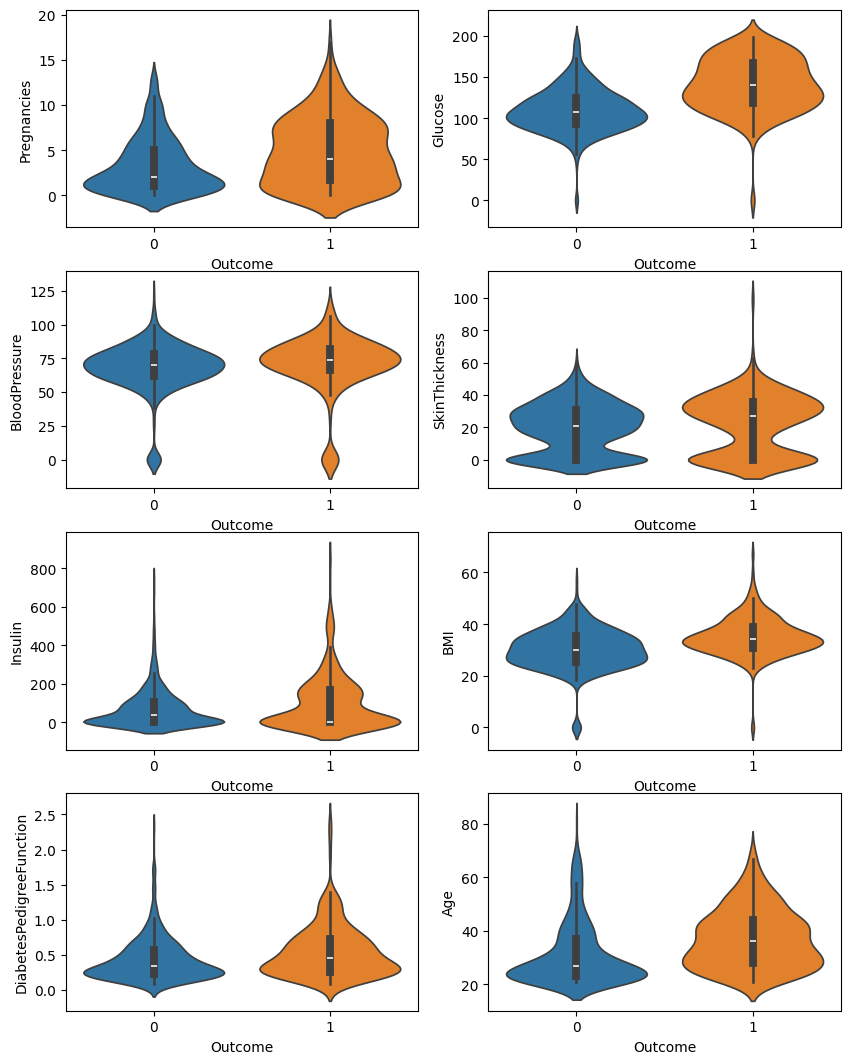

In [80]:
# violinplot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 13))

# 컬럼의 수만큼 for문을 만들어서 서브플롯으로 시각화
for i, col_name in enumerate(cols[:-1]):
  row = i // 2
  col = i % 2
  print(i, col_name, row, col)
  sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col], palette=palette)


In [ ]:
# ㄴ BloodPressure, SkinThickness, Insulin이 0값에 몰려 있는 경향 -> 결측치



> Lmplot

lmplot은 상관계수가 높은 두 변수에 대해 시각화한다.

<Axes: xlabel='Glucose', ylabel='Insulin'>

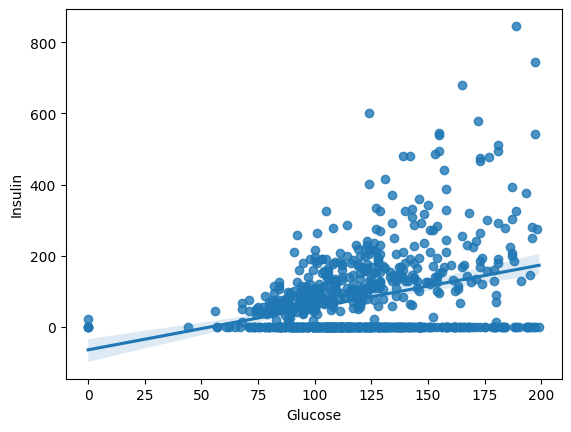

In [82]:
# Glucose와 Insulin을 Outcome으로 구분
# A: regplot (hue 지정이 불가능)
sns.regplot(data=df, x="Glucose", y="Insulin")

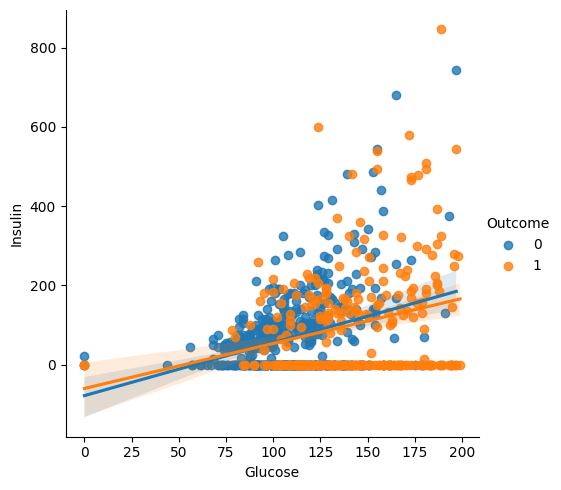

In [83]:
# Glucose와 Insulin을 Outcome으로 구분
# B: lmplot
sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

# -> Insulin은 0인 값이 매우 많다. (결측치)

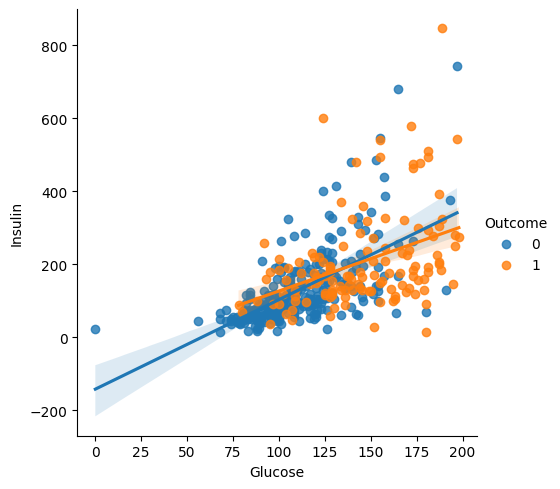

In [84]:
# Insulin 수치가 0 이상인 데이터로만 그리기
sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

> Pairplot

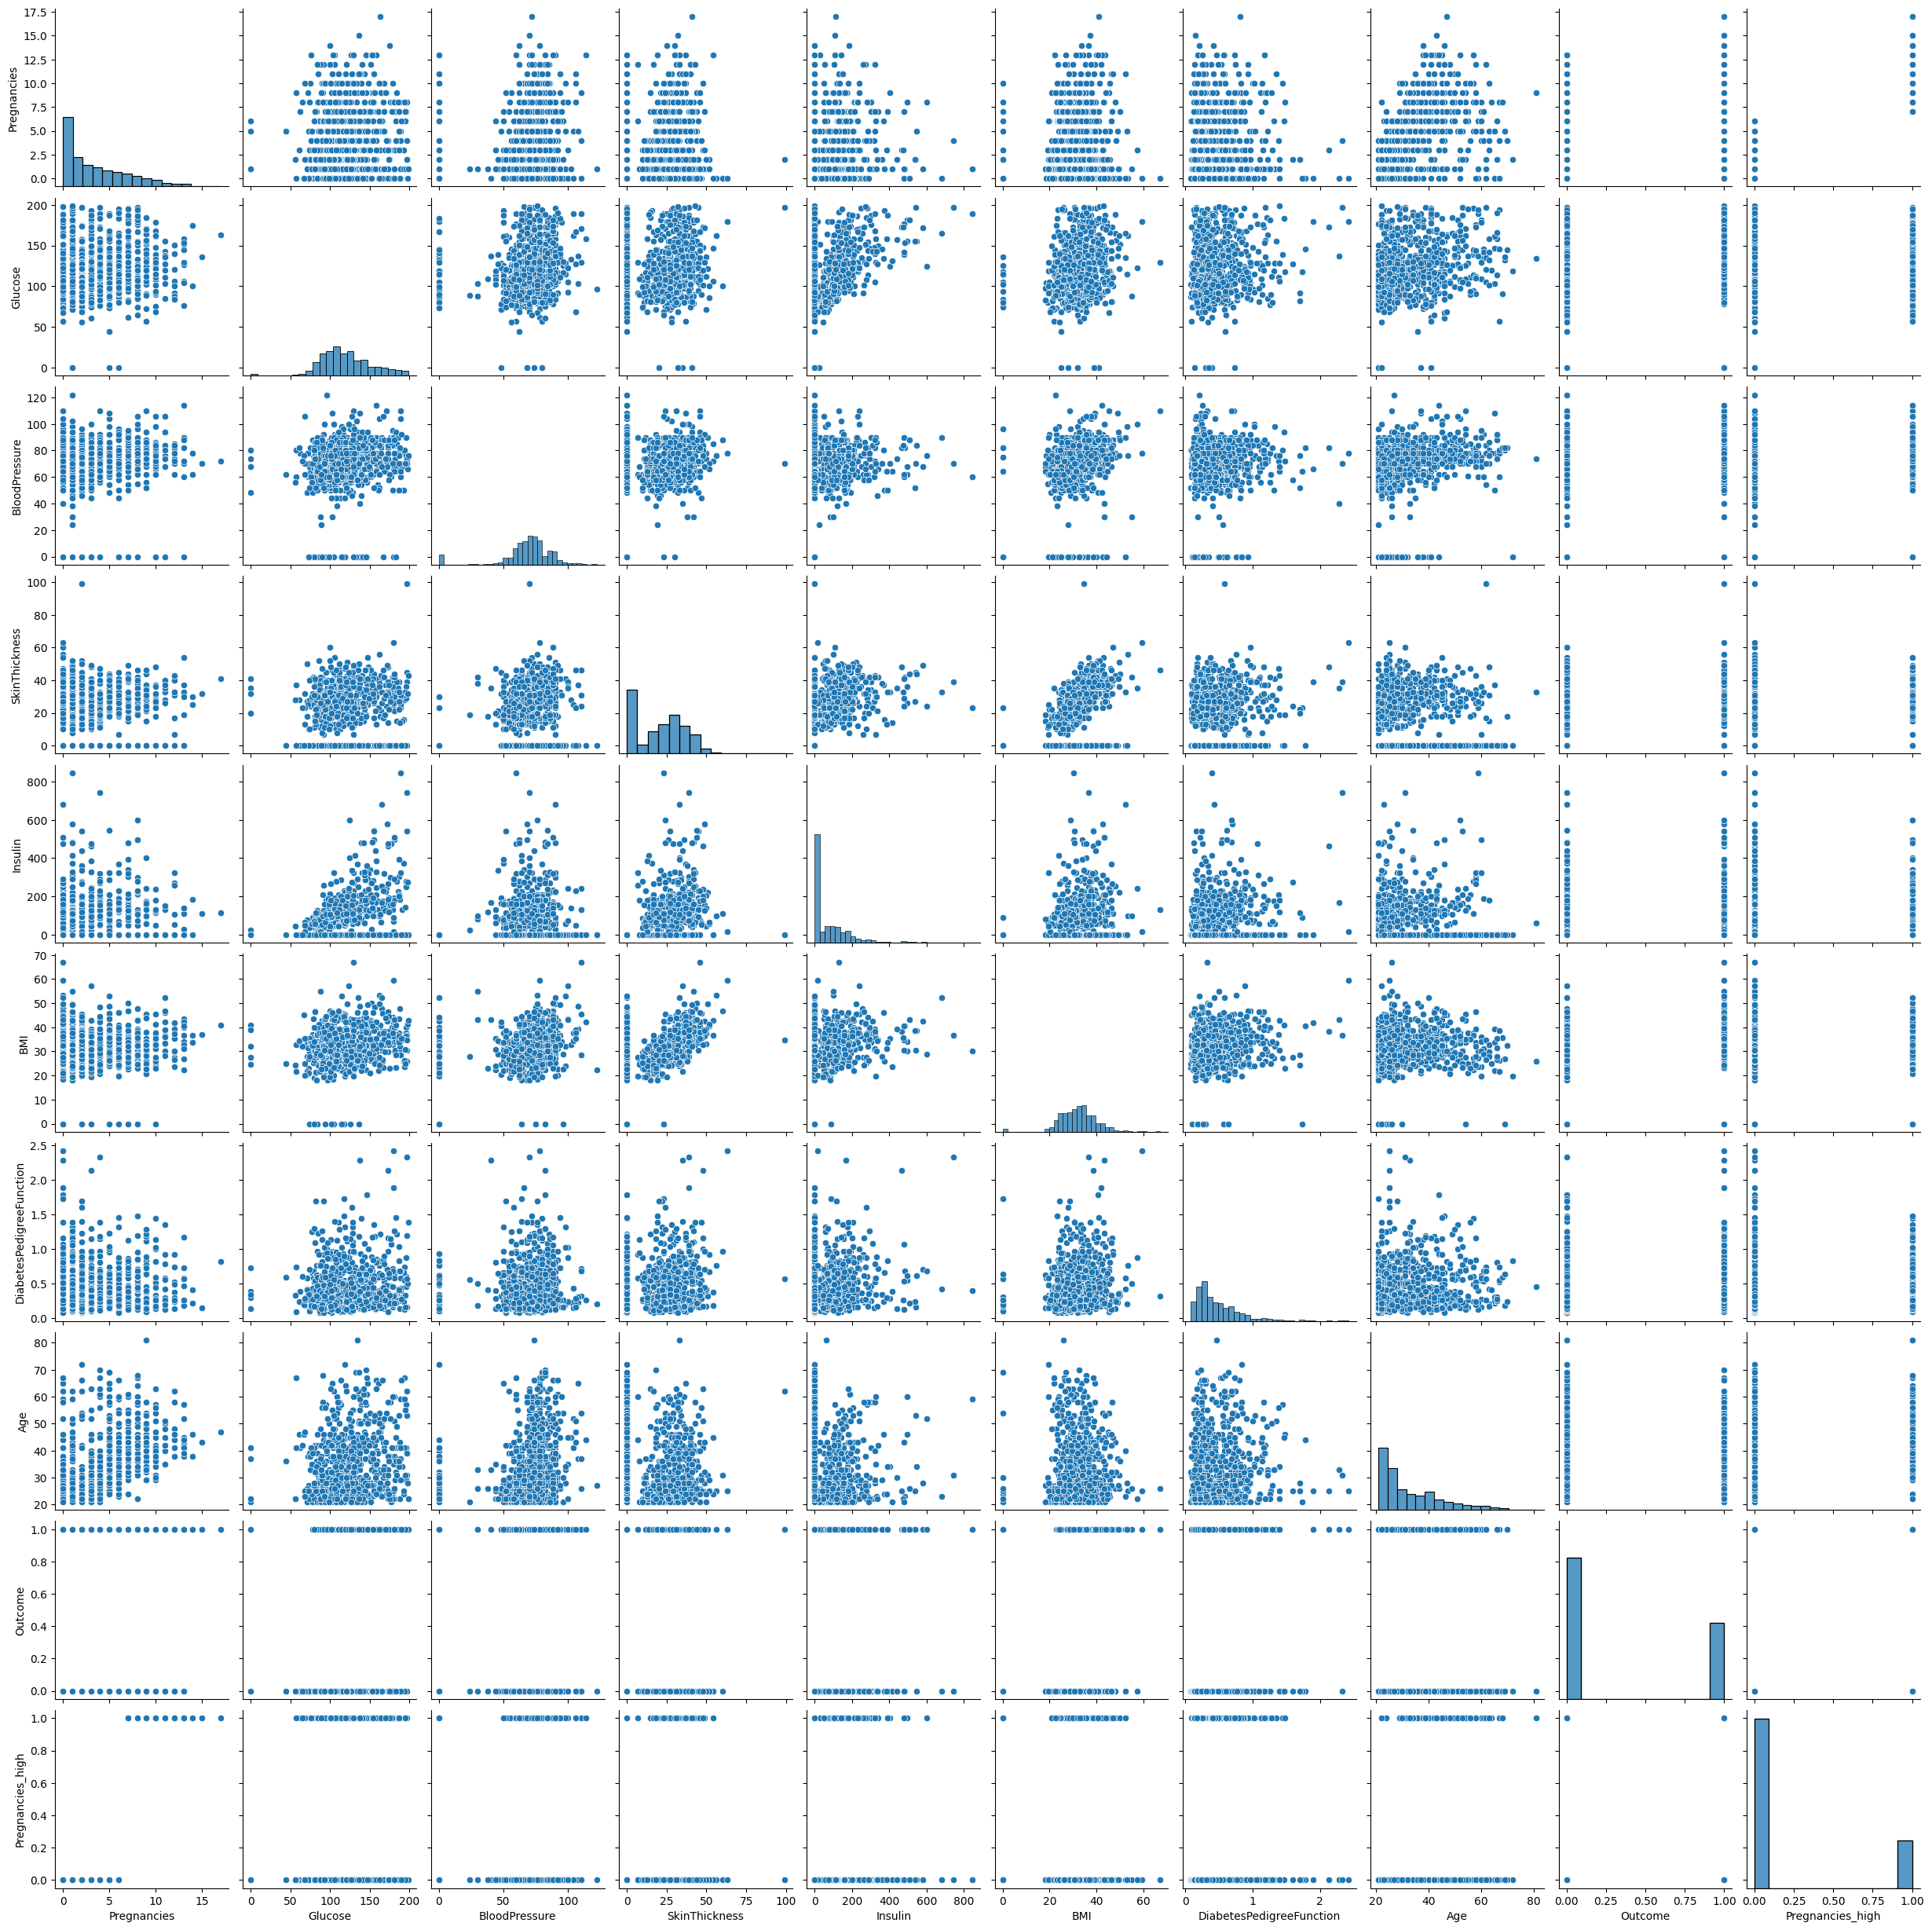

In [85]:
# 기본적인 pairplot
sns.pairplot(df)

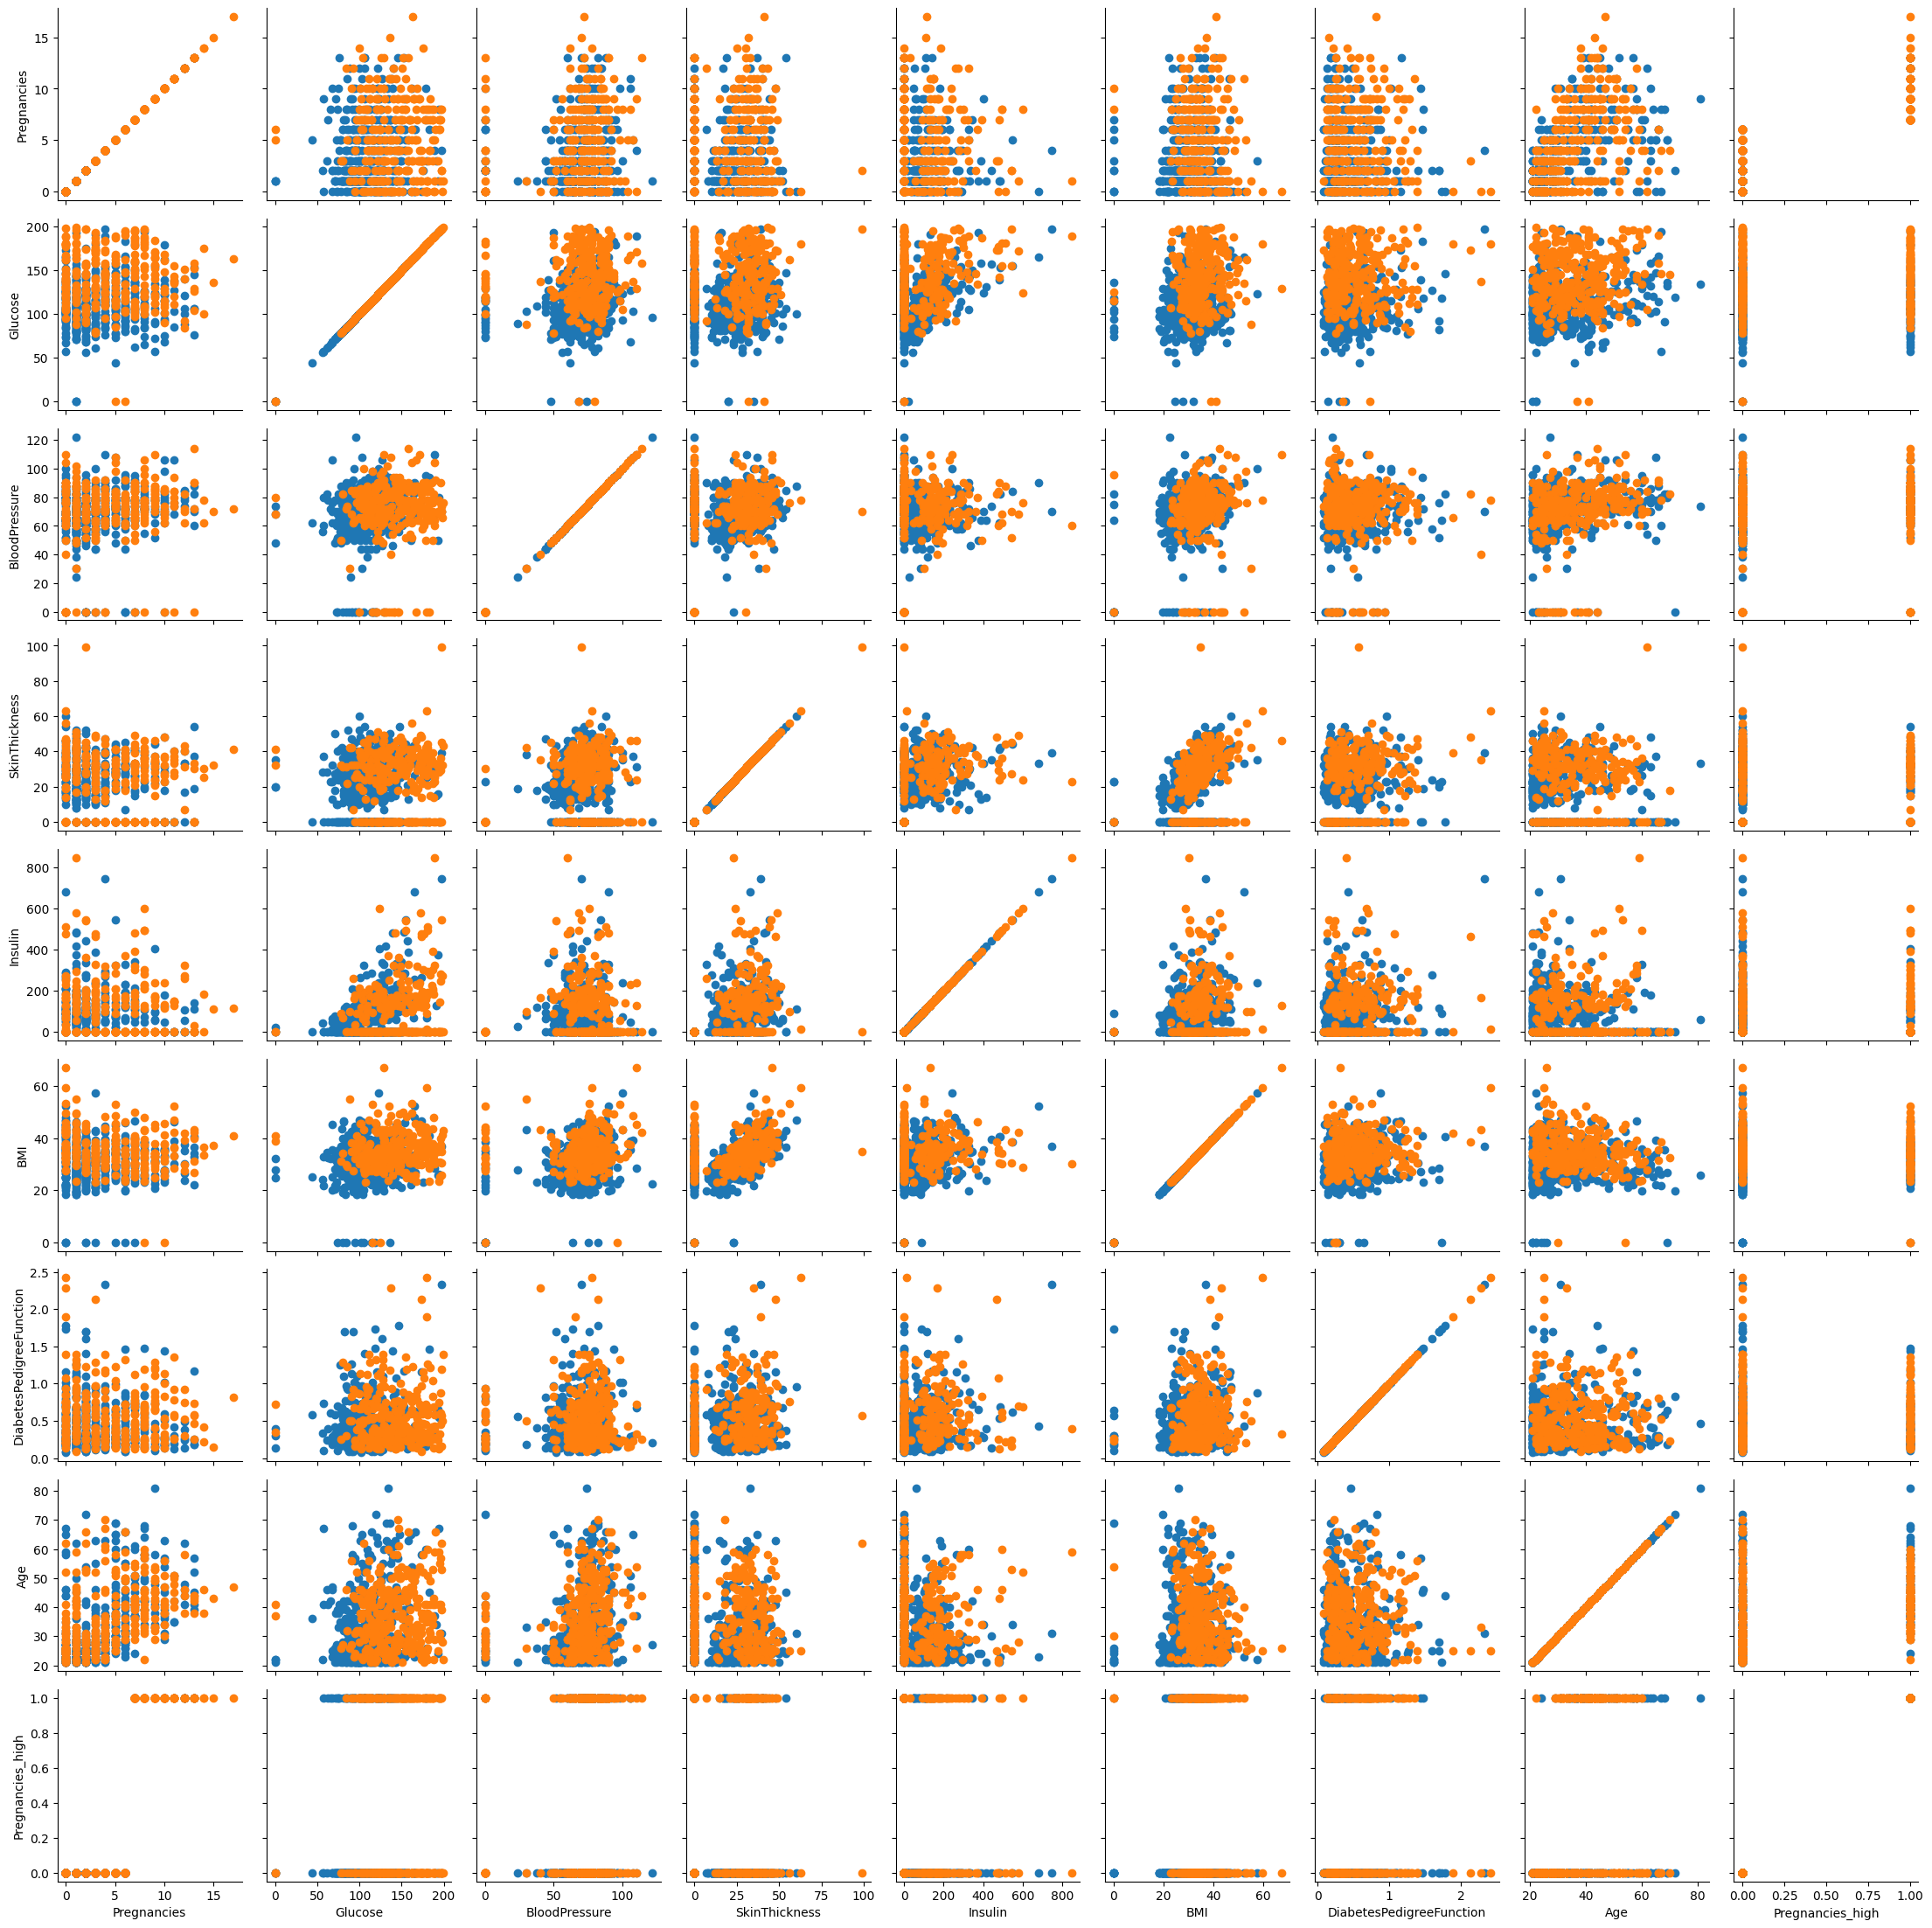

In [88]:
# PairGrid를 통해 모든 변수에 대해 OUtcome에 따른 scatterplot 그리기

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

###11. 상관 분석

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계, <br>
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계, <br>
r이 -0.3과 -0.1 사이이면, 약한 음적 상관관계, <br>
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계, <br>
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계, <br>
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계, <br>
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계 <br>

In [90]:
# (A: 결측치 처리하지 않은 상태)
df_corr = df.corr()
df_corr.style.background_gradient()

<Axes: >

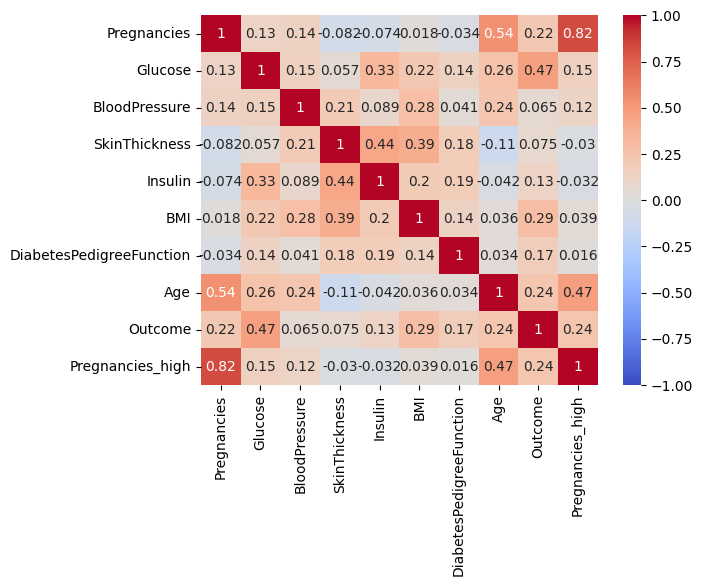

In [94]:
# 위에서 구한 상관계수를 heatmap으로 시각화
sns.heatmap(df_corr, vmax=1, vmin=-1, annot=True, cmap="coolwarm")

# -> 음의 상관관계가 강한 데이터는 없는 것으로 보임
# 그나마 강한 상관관계를 보이는 것: Glucose와 Outcome
# (Pregnacies에서 Pregnancies_high을 만들었으므로 둘은 상관관계가 높을 수밖에 없음)

In [95]:
# B: 정답 값인 Outcome을 제외하고 feature로 사용할 컬럼들에 대해 0을 결측치로 만들어 줌
df_matrix = df.iloc[:,:-2].replace(0, np.nan) # (Age까지만 가져옴)
df_matrix["Outcome"] = df["Outcome"] # df_matrix에 Outcome 컬럼 추가
df_matrix.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [96]:
dfm_corr = df_matrix.corr()
dfm_corr.style.background_gradient()

<Axes: >

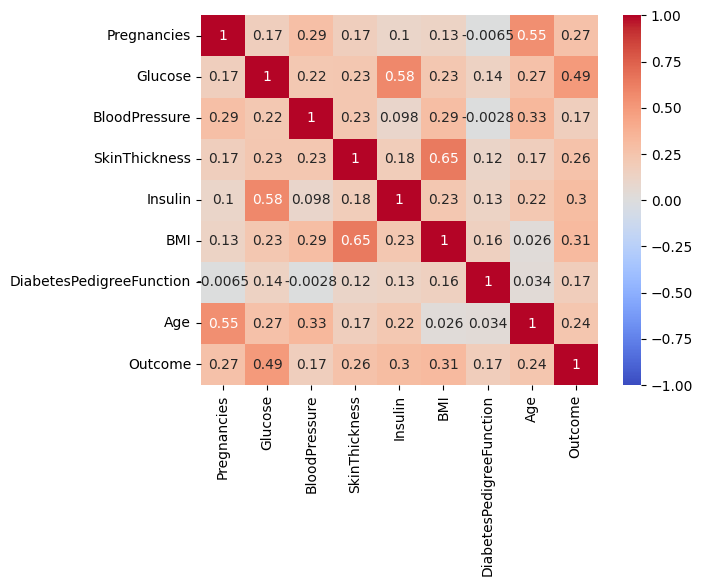

In [97]:
sns.heatmap(dfm_corr, vmax=1, vmin=-1, annot=True, cmap="coolwarm")

# Outcome, Glucose 상관관계 높음
# Insulin, Glucose 상관관계 높음 (결측치 처리 후 나타난 결과)
# Outcome, Insulin 상관관계 꽤 있음

In [98]:
# Outcome 수치에 대한 다른 컬럼들의 상관관계
dfm_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

####상관계수가 높은 변수끼리 보기

<Axes: xlabel='Insulin', ylabel='Glucose'>

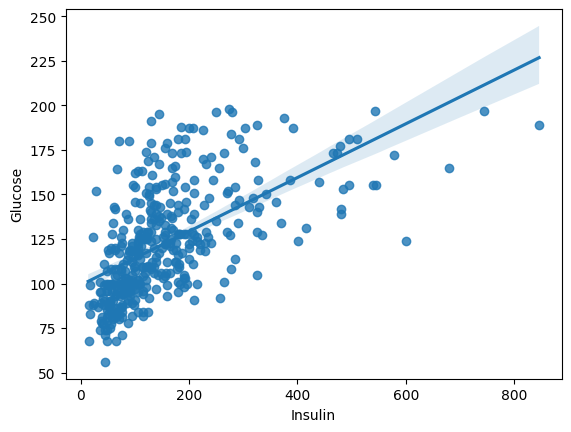

In [99]:
# Insulin과 Glucose로 regplot 그리기
sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

# -> 회귀선 방향이 양의 상관관계
# 이상치가 있음

<Axes: xlabel='Insulin', ylabel='Glucose'>

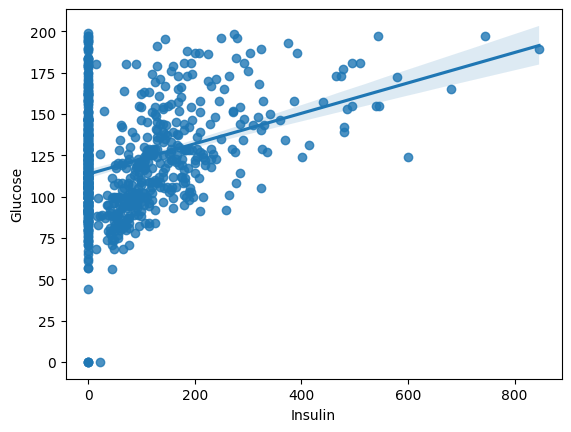

In [100]:
# (참고) 결측치 처리하기 전 데이터로 regplot
sns.regplot(data=df, x="Insulin", y="Glucose")

<Axes: xlabel='Age', ylabel='Pregnancies'>

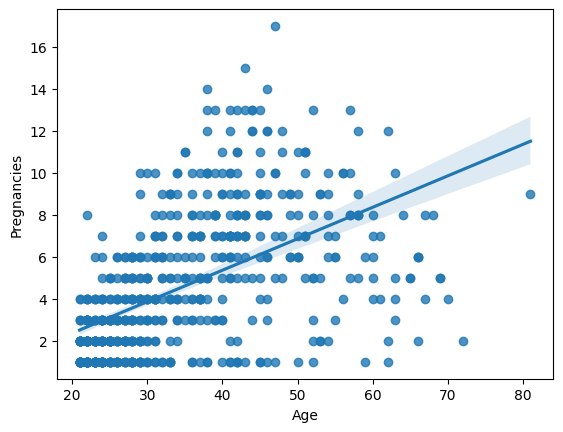

In [101]:
# Age와 Pregnancies로 regplot 그리기
sns.regplot(data=df_matrix, x="Age", y="Pregnancies")

# 이상치가 있음

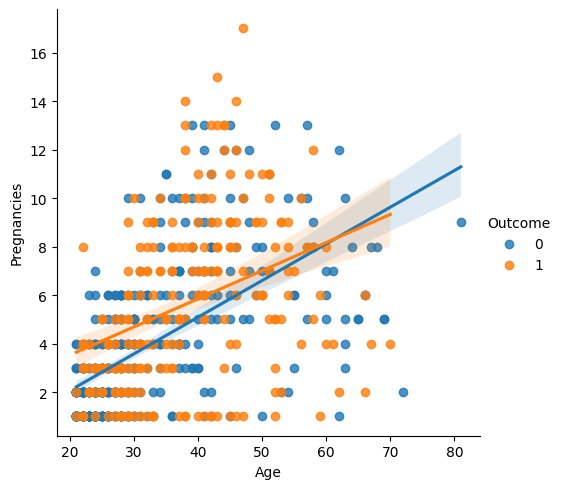

In [102]:
# Age와 Pregnancies로 lmplot을 그리고 Outcome에 따라 다른 색상으로 표현하기
sns.lmplot(data=df_matrix, x="Age", y="Pregnancies", hue="Outcome")

# 당뇨병 발병 여부에 따른 회귀선의 큰 차이는 없음

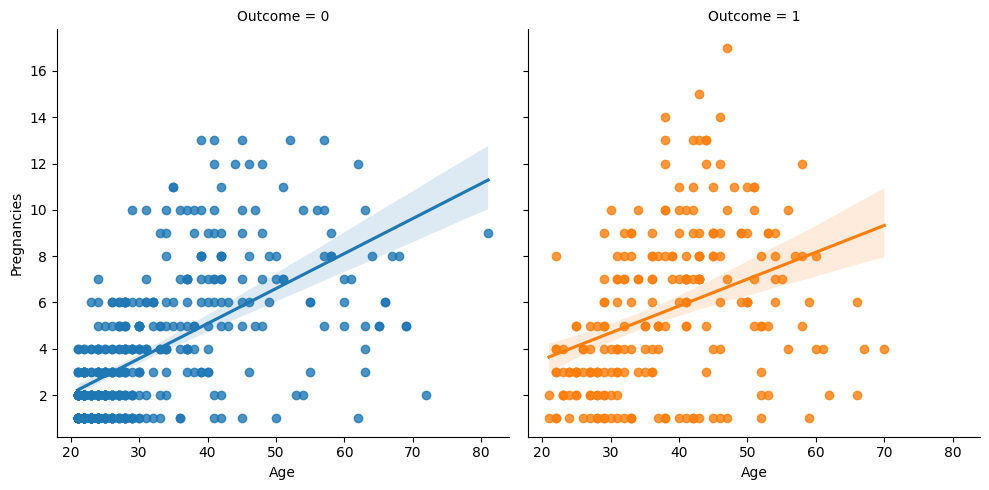

In [103]:
# 그래프를 따로 분리하여 그리기
sns.lmplot(data=df_matrix, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")